Usa.gov data from bit.ly

In [1]:
#Recieving the data#
import numpy as np
path = './usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline() # gives a string, not a dictionary

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
#
import json
records = [json.loads(line) for line in open(path)] # transforms data into a real dictionary
records # a list containg all the dictionaries

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [3]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec] # for each dictionary (rec) if 'tz' exist
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [4]:
from collections import Counter
counter = Counter(time_zones)
counter.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [5]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts
print(get_counts2(time_zones))

defaultdict(<class 'int'>, {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax'

In [6]:
#Using pandas
from pandas import DataFrame, Series
import pandas as pd
frame = DataFrame(records) # turns list with dictionaries into a table
frame['tz'] # returns one column
#frame

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [7]:
tz_counts = frame['tz'].value_counts()
tz_counts

tz
America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: count, Length: 97, dtype: int64

In [8]:
clean_tz = frame['tz'].fillna('Missing') # doesn't do anything because no missing data, it's all ''
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

<Axes: ylabel='tz'>

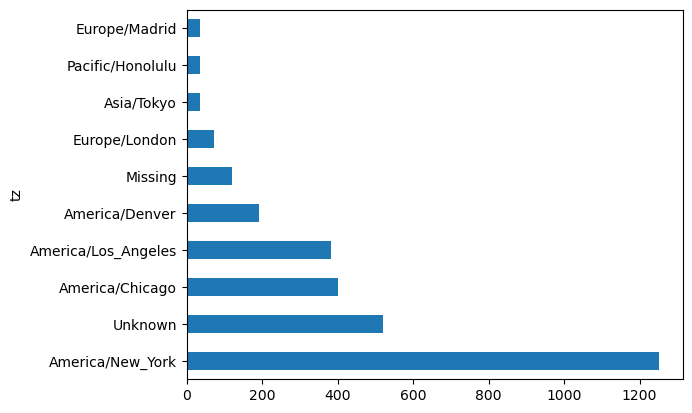

In [9]:

tz_counts[:10].plot(kind='barh', rot=0)

In [10]:
results = Series([x.split()[0] for x in frame.a.dropna()]) # .dropna() removes any row that contains at least one missing value, 'a' is the name of column
# Series([x for x in frame.a.dropna()]) frame is frame = DataFrame(records) 
results[:5]
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [11]:
cframe = frame[frame.a.notnull()] # just returning the ones where a is not null (in this case makes no difference)
cframe
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows') # np.where takes 1. condition, 2. if true, 3. if false
operating_system[:10]
operating_system = Series([x for x in operating_system])
operating_system

0           Windows
1       Not Windows
2           Windows
3       Not Windows
4           Windows
           ...     
3435        Windows
3436        Windows
3437    Not Windows
3438    Not Windows
3439        Windows
Length: 3440, dtype: object

In [12]:
by_tz_os = cframe.groupby(['tz', operating_system])
by_tz_os.size().unstack() # size() to display .unstack() to make a table

,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,NaN,1.0
...,...,...
Europe/Volgograd,NaN,1.0
Europe/Warsaw,2.0,14.0
Europe/Zurich,1.0,3.0


In [13]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,2.0,14.0
Europe/Zurich,1.0,3.0


In [14]:
indexer = agg_counts.sum(1).argsort() # sum(1) - summing all windows and not windows 1 - axis #
# .argsort() gives indices in increacsing order
indexer[:10]

tz
                                  21
Africa/Cairo                      51
Africa/Casablanca                 52
Africa/Ceuta                      36
Africa/Johannesburg               53
Africa/Lusaka                     34
America/Anchorage                 54
America/Argentina/Buenos_Aires    55
America/Argentina/Cordoba         56
America/Argentina/Mendoza         27
dtype: int64

In [15]:
count_subset = agg_counts.take(indexer)[-10:] #take the same as count_subset  = agg_counts.iloc[indexer]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,12.0,21.0
Europe/Madrid,15.0,19.0
Pacific/Honolulu,10.0,25.0
Asia/Tokyo,14.0,23.0
Europe/London,32.0,40.0
America/Denver,56.0,125.0
America/Los_Angeles,122.0,247.0
America/Chicago,131.0,249.0
,180.0,316.0


                     Not Windows   Windows
tz                                        
America/Sao_Paulo       0.363636  0.636364
Europe/Madrid           0.441176  0.558824
Pacific/Honolulu        0.285714  0.714286
Asia/Tokyo              0.378378  0.621622
Europe/London           0.444444  0.555556
America/Denver          0.309392  0.690608
America/Los_Angeles     0.330623  0.669377
America/Chicago         0.344737  0.655263
                        0.362903  0.637097
America/New_York        0.348039  0.651961


<Axes: ylabel='tz'>

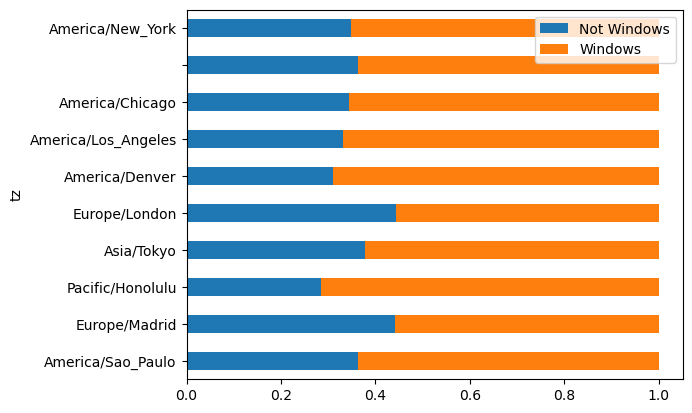

In [16]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0) #makes so all of them become float to display 100% as 1
print(normed_subset)
normed_subset.plot(kind='barh', stacked=True) # stacked - one agains other one line